In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
plants = ["index","Nuclear", "Oil", "Coal", "Coal + CCS", "IGCC", "IGCC + CCS", "CCGT", "CCGT + CCS", "Solid Biomass", 'S Biomass CCS', "BIGCC", "BIGCC + CCS", "Biogas", "Biogas + CCS", "Tidal", "Large Hydro", "Onshore", "Offshore", 'Solar PV', "CSP", "Geothermal", "Wave", "Fuel Cells", "CHP"]

results =  pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/outputs/capacity_result.csv", names=list(range(48)))
uk_capacity = results.iloc[:,0:24].reset_index()
ireland_capacity = results.iloc[:,24:].reset_index()

uk_capacity.columns = plants
ireland_capacity.columns = plants
uk_capacity

,index,Nuclear,Oil,Coal,Coal + CCS,IGCC,IGCC + CCS,CCGT,CCGT + CCS,Solid Biomass,...,Tidal,Large Hydro,Onshore,Offshore,Solar PV,CSP,Geothermal,Wave,Fuel Cells,CHP
0,0,0,1.1919,0.29217,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.25401,0.000,0.000,0.000,0,0,0,0,0
1,1,0,1.5163,0.29233,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.14759,0.000,0.000,0.000,0,0,0,0,0
2,2,0,1.6904,0.27892,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.21600,0.000,0.000,0.000,0,0,0,0,0
3,3,0,1.8645,0.28547,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.20397,0.000,0.000,0.000,0,0,0,0,0
4,4,0,1.9158,0.28656,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.24894,0.000,0.000,0.000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,187,0,-0.0000,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0,0.00000,30.709,37.283,43.871,0,0,0,0,0
188,188,0,-0.0000,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0,0.00000,30.910,37.527,44.159,0,0,0,0,0
189,189,0,-0.0000,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0,0.00000,31.219,37.902,44.600,0,0,0,0,0
190,190,0,-0.0000,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,0,0.00000,31.574,38.334,45.108,0,0,0,0,0


In [4]:
uk_capacity_long = pd.melt(uk_capacity, id_vars="index")
uk_capacity_long

,index,variable,value
0,0,Nuclear,0.0
1,1,Nuclear,0.0
2,2,Nuclear,0.0
3,3,Nuclear,0.0
4,4,Nuclear,0.0
...,...,...,...
4603,187,CHP,0.0
4604,188,CHP,0.0
4605,189,CHP,0.0
4606,190,CHP,0.0


Text(0.5, 1.0, 'UK Electricity Generation')

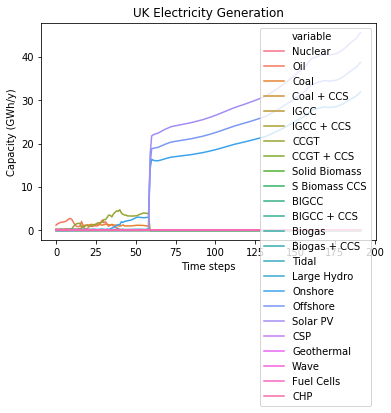

In [5]:
sns.lineplot(data=uk_capacity_long, x="index", y="value", hue="variable")
plt.ylabel("Capacity (GWh/y)")
plt.xlabel("Time steps")
plt.title("UK Electricity Generation")

Text(0.5, 1.0, 'UK Electricity Generation')

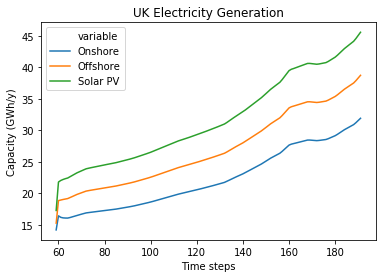

In [6]:
sns.lineplot(data=uk_capacity_long[uk_capacity_long.value>10], x="index", y="value", hue="variable")
plt.ylabel("Capacity (GWh/y)")
plt.xlabel("Time steps")
plt.title("UK Electricity Generation")

In [7]:
ireland_capacity_long = pd.melt(ireland_capacity, id_vars="index")
ireland_capacity_long

,index,variable,value
0,0,Nuclear,3.4683
1,1,Nuclear,3.6731
2,2,Nuclear,3.9171
3,3,Nuclear,3.7329
4,4,Nuclear,4.4823
...,...,...,...
4603,187,CHP,0.0000
4604,188,CHP,0.0000
4605,189,CHP,0.0000
4606,190,CHP,0.0000


Text(0.5, 1.0, 'Ireland Electricity Generation')

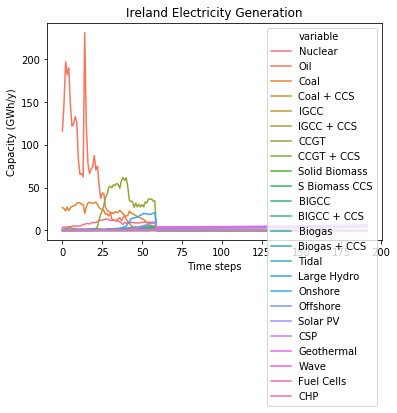

In [8]:
sns.lineplot(data=ireland_capacity_long, x="index", y="value", hue="variable")
plt.ylabel("Capacity (GWh/y)")
plt.xlabel("Time steps")
plt.title("Ireland Electricity Generation")

Text(0.5, 1.0, 'Ireland Electricity Generation')

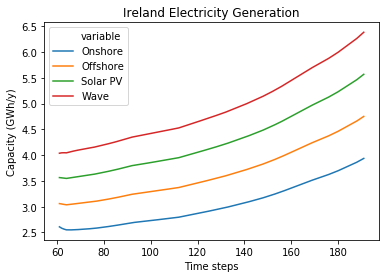

In [9]:
sns.lineplot(data=ireland_capacity_long[(ireland_capacity_long['index']>60)& (ireland_capacity_long['value']>2)], x="index", y="value", hue="variable")
plt.ylabel("Capacity (GWh/y)")
plt.xlabel("Time steps")
plt.title("Ireland Electricity Generation")

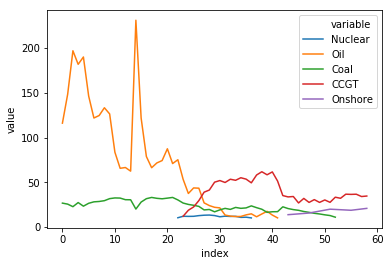

In [10]:
sns.lineplot(data=ireland_capacity_long[ireland_capacity_long.value>10], x="index", y="value", hue="variable")

## Both together

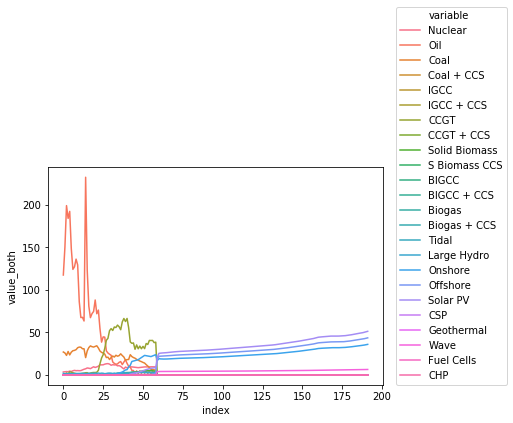

In [27]:
uk_capacity_long
ireland_capacity_long

both_capacity_long = uk_capacity_long.merge(ireland_capacity_long, on=["index",'variable'])
both_capacity_long['value_both'] = both_capacity_long['value_x'] +  both_capacity_long['value_y']
both_capacity_long
sns.lineplot(data=both_capacity_long, x="index", y="value_both", hue="variable")
plt.legend(loc=(1.04,0))


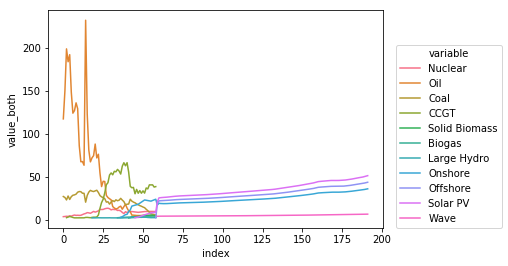

In [40]:
sns.lineplot(data=both_capacity_long[(both_capacity_long['index']<200) & (both_capacity_long['value_both']>2)], x="index", y="value_both", hue="variable")
plt.legend(loc=(1.04,0))

# Market Share

In [12]:
def get_data(filename):
    plants = ["index","Nuclear", "Oil", "Coal", "Coal + CCS", "IGCC", "IGCC + CCS", "CCGT", "CCGT + CCS", "Solid Biomass", 'S Biomass CCS', "BIGCC", "BIGCC + CCS", "Biogas", "Biogas + CCS", "Tidal", "Large Hydro", "Onshore", "Offshore", 'Solar PV', "CSP", "Geothermal", "Wave", "Fuel Cells", "CHP"]

    results =  pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/17-ftt-power-reinforcement/data/outputs/{}.csv".format(filename), names=list(range(48)))
    uk_result = results.iloc[:,0:24].reset_index()
    ireland_result = results.iloc[:,24:].reset_index()

    uk_result.columns = plants
    ireland_result.columns = plants
    
    ireland_capacity_long = pd.melt(ireland_result, id_vars="index")
    uk_capacity_long = pd.melt(uk_result, id_vars="index")
    
    return (uk_capacity_long, ireland_capacity_long)
    
    

In [13]:
uk_market_share, ireland_market_share = get_data("market_share")

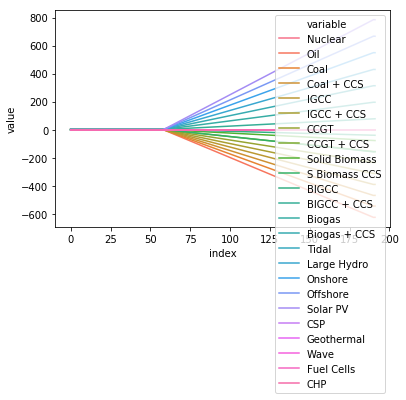

In [14]:
sns.lineplot(data=uk_market_share, x="index", y="value", hue="variable")

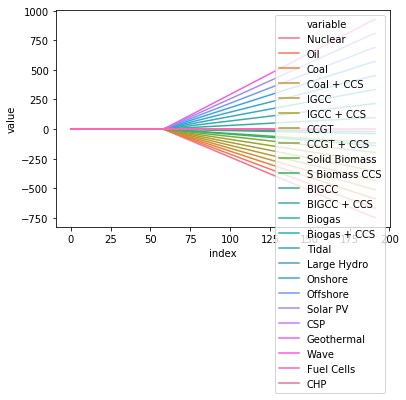

In [15]:
sns.lineplot(data=ireland_market_share, x="index", y="value", hue="variable")